In [50]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("fake_bills.csv", sep=";")

In [56]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [60]:
print(df.isnull().sum()) 

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


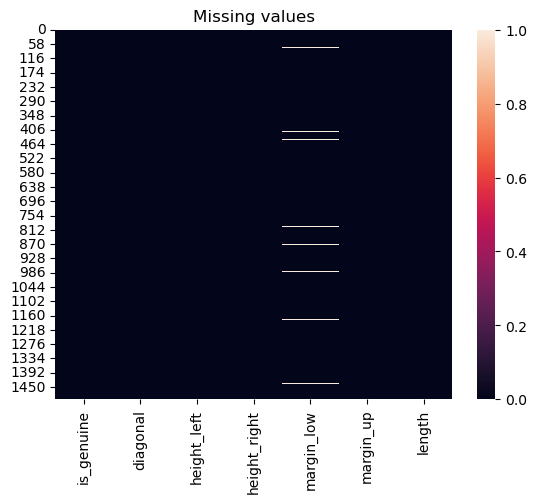

In [62]:
sns.heatmap(df.isnull())
plt.title('Missing values')
plt.show()

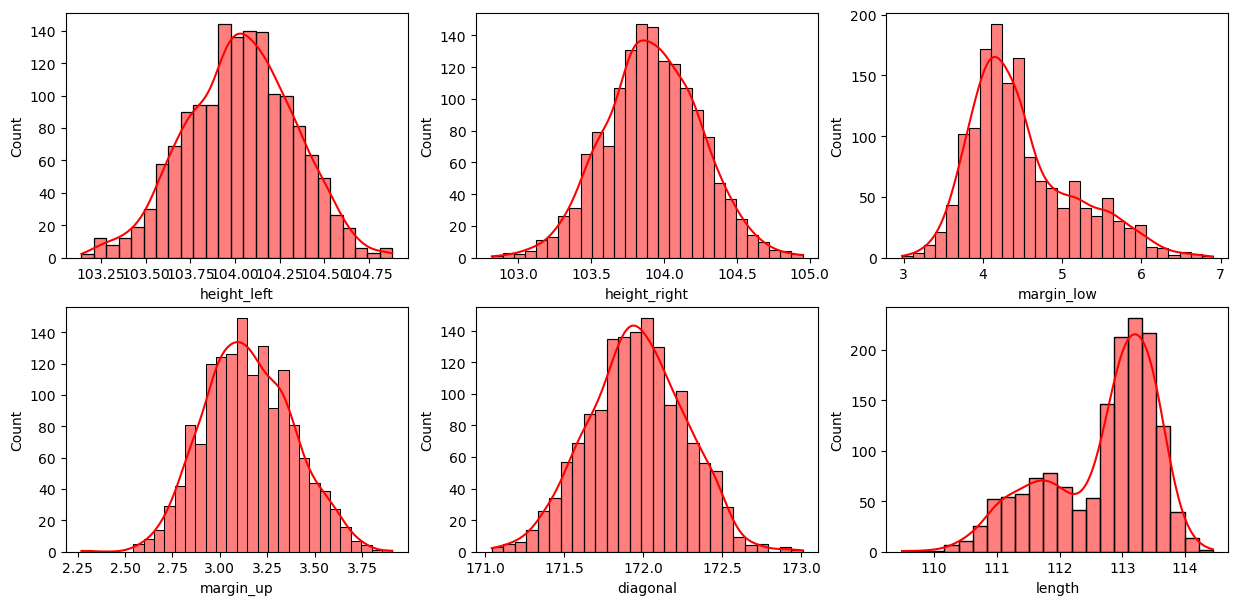

In [89]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",kde = True,ax = axes[0,0],color='red')
fig2 = sns.histplot(data = df,x = "height_right",kde = True,ax = axes[0,1],color='red')
fig3 = sns.histplot(data = df,x = "margin_low",kde = True,ax = axes[0,2],color='red')
fig4 = sns.histplot(data = df,x = "margin_up",kde = True,ax = axes[1,0],color='red')
fig5 = sns.histplot(data = df,x = "diagonal",kde = True,ax = axes[1,1],color='red')
fig6 = sns.histplot(data = df,x = "length",kde = True,ax = axes[1,2],color='red')
plt.show()

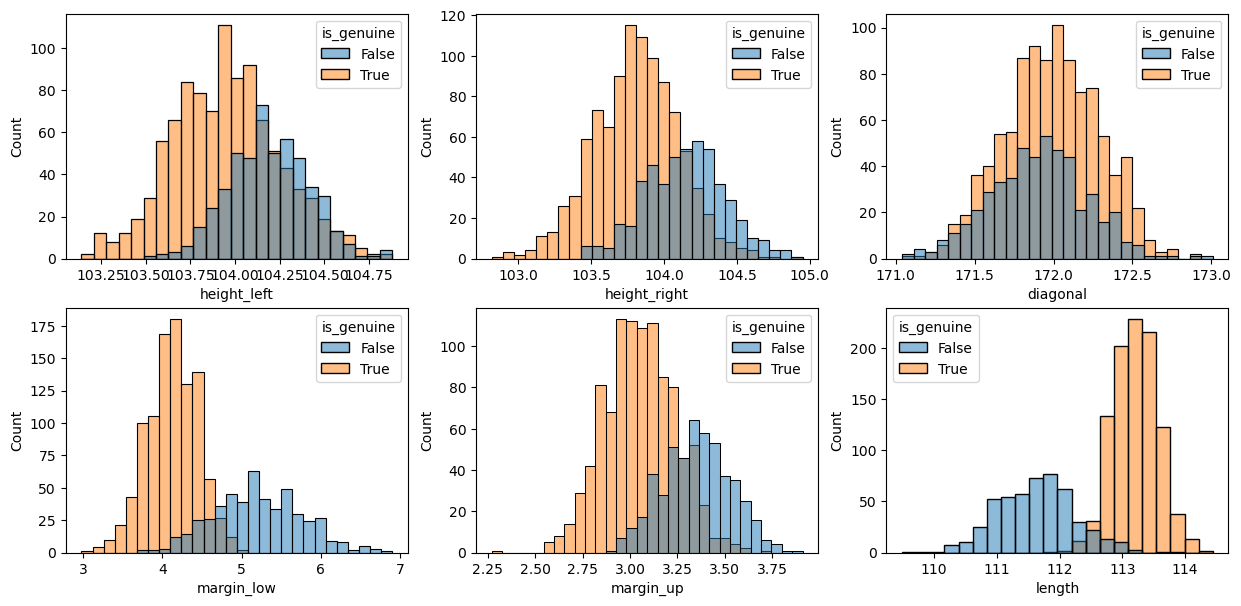

In [95]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",hue = 'is_genuine',ax = axes[0,0])
fig2 = sns.histplot(data = df,x = "height_right",hue = 'is_genuine',ax = axes[0,1])
fig4 = sns.histplot(data = df,x = "margin_low",hue = 'is_genuine',ax = axes[1,0])
fig3 = sns.histplot(data = df,x = "diagonal",hue = 'is_genuine',ax = axes[0,2])
fig5 = sns.histplot(data = df,x = "margin_up",hue = 'is_genuine',ax = axes[1,1])
fig6 = sns.histplot(data = df,x = "length",hue = 'is_genuine',ax = axes[1,2])
plt.show()

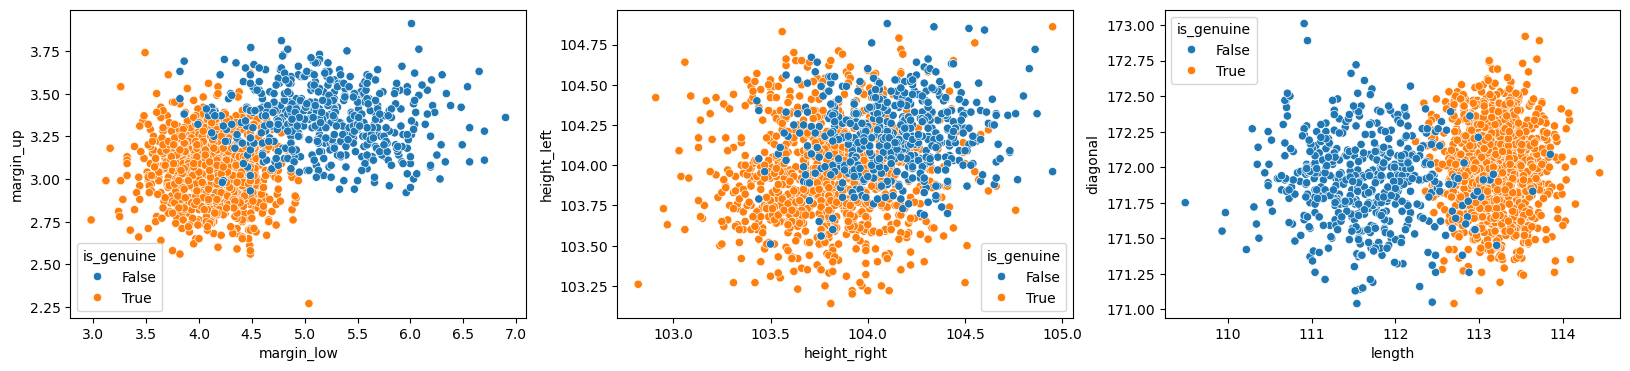

In [97]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
fig1 = sns.scatterplot(data = df, x = "margin_low",y = "margin_up",hue = "is_genuine",ax=axes[0])
fig1 = sns.scatterplot(data = df, x = "height_right",y = "height_left",hue = "is_genuine",ax=axes[1])
fig1 = sns.scatterplot(data = df, x = "length",y = "diagonal",hue = "is_genuine",ax=axes[2])
plt.show()

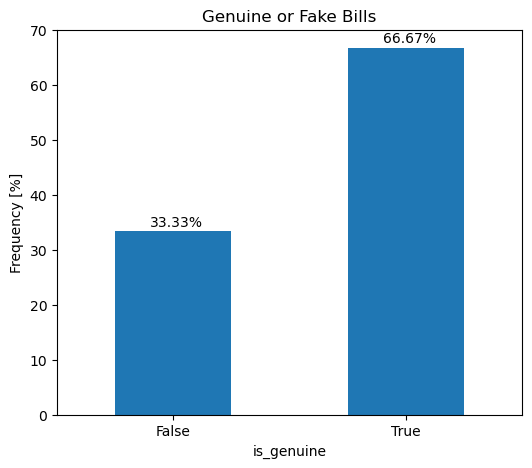

In [99]:
plt.figure(figsize=(6,5))
plt.title('Genuine or Fake Bills')
plt.xlabel('is_genuine')
plt.ylabel('Frequency [%]')

ax = (df.is_genuine.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [101]:
df.margin_low

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1500, dtype: float64

In [103]:
df.margin_low.median()

4.33

In [105]:
mean_margin_low=df.margin_low.mean()
mean_margin_low

4.485967190704033

In [107]:
df['margin_low']=df['margin_low'].fillna(mean_margin_low)

In [109]:
print(df.isnull().sum()) 

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [111]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.655569,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.330000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [117]:
df = pd.DataFrame(df,columns=df.columns)
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
